# Project: Reading Writing Fingerprints

## Task 1: Import the libraries

In [1]:
import pandas as pd
import spacy
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from faststylometry import Corpus
from faststylometry import tokenise_remove_pronouns_en
from faststylometry import calculate_burrows_delta
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import numpy as np
from numpy.linalg import norm

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Task 2: Load the Dataset

In [2]:
df = pd.read_csv('data.csv', sep=',')
df.head()

,Unnamed: 0,ALink,SName,Lyric
0,18634,/bob-dylan/,Blowin' In The Wind,How many roads must a man walk down\nBefore yo...
1,18635,/bob-dylan/,Like A Rolling Stone,Once upon a time you dressed so fine\nThrew th...
2,18636,/bob-dylan/,Knockin' On Heaven's Door,"Mama, take this badge off of me\nI can't use i..."
3,18637,/bob-dylan/,Hurricane,Pistol shots ring out in the ballroom night\nE...
4,18638,/bob-dylan/,Mr. Tambourine Man,"Hey! Mr. Tambourine Man, play a song for me,\n..."


## Task 3: Preprocess Song Lyrics for Analysis

In [3]:
nlp = spacy.load('en_core_web_sm')
def clean_text(doc):
     doc = doc.lower()
     doc = nlp(doc)
     tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
     return " ".join(tokens)

df['clean_text'] = df['Lyric'].apply(clean_text)

## Task 4: Get Word Lengths

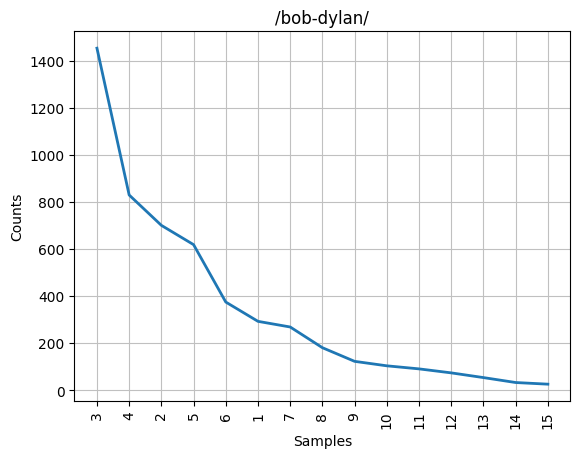

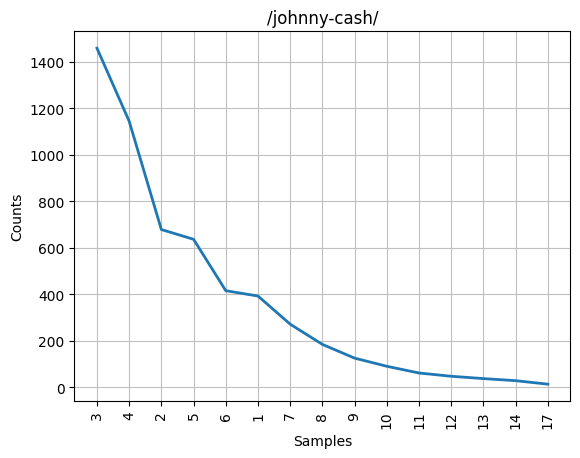

In [4]:
authors = list(df.ALink.unique())

for author in authors:
  temp_df = df[df['ALink']==author]
  ls = temp_df.Lyric.to_string()
  words = list(ls.split())
  lengths = [len(word) for word in words]
  fq = nltk.FreqDist(lengths)
  fq.plot(15, title=author)

## Task 5: Get Word Frequencies

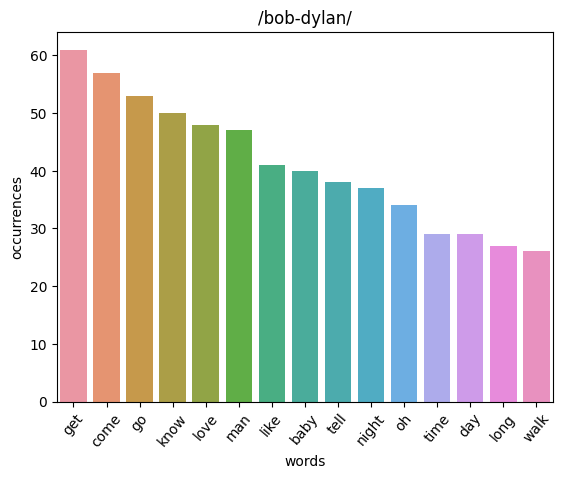

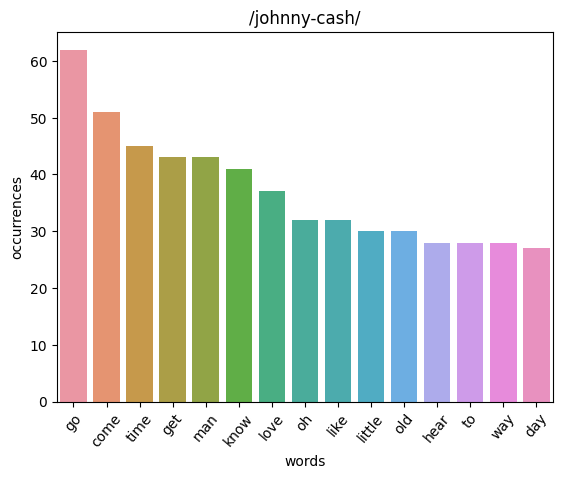

In [5]:
for author in authors:
  temp_df = df[df['ALink']==author]
  ls = temp_df.clean_text.to_string()
  word_list = ls.split()
  word_freq = Counter(word for word in word_list if word.isalpha())
  sorted_word_freq = word_freq.most_common(15)
  sorted_word_freq = pd.DataFrame.from_dict(sorted_word_freq)
  sorted_word_freq.columns = ['words', 'occurrences']
  sns.barplot(sorted_word_freq, x='words', y='occurrences')
  plt.xticks(rotation=50)
  plt.title(author)
  plt.show()

## Task 6: Get Bigram Frequencies

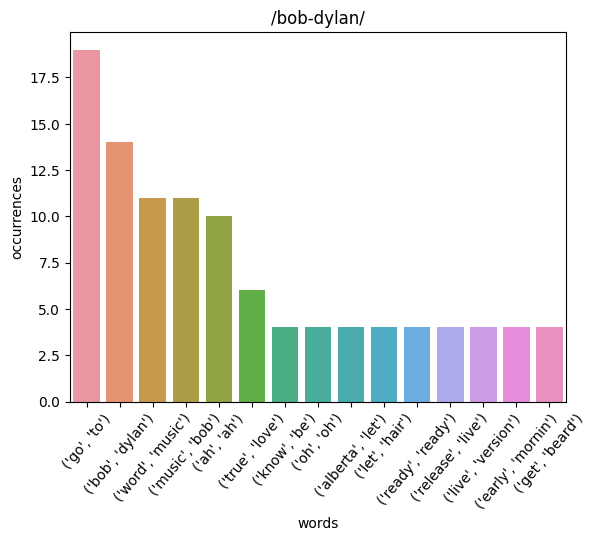

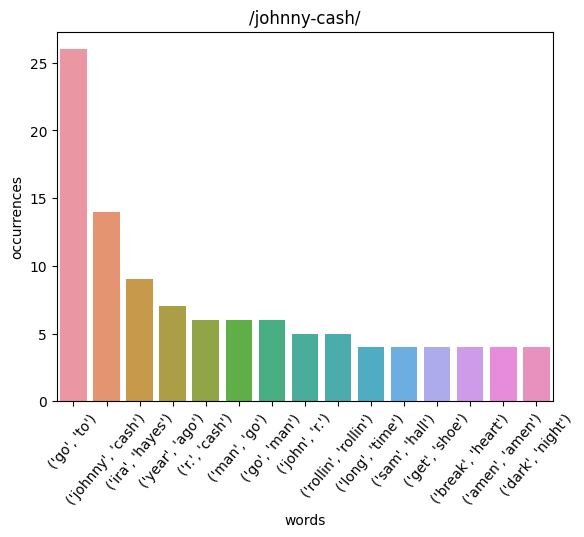

In [6]:
for author in authors:
  temp_df = df[df['ALink']==author]
  ls = temp_df.clean_text.to_string()
  word_list = ls.split()
  bigrams = list(zip(word_list, word_list[1:]))
  bigram_freq = Counter(bigram for bigram in bigrams)
  sorted_bigram_freq = bigram_freq.most_common(15)
  sorted_bigram_freq = pd.DataFrame.from_dict(sorted_bigram_freq)
  sorted_bigram_freq.columns = ['words', 'occurrences']
  sns.barplot(sorted_bigram_freq, x='words', y='occurrences')
  plt.xticks(rotation=50)
  plt.title(author)
  plt.show()

## Task 7: Create Test and Train Corpora

In [7]:
test_df = df.loc[[320]]
df = df.drop(320)
test_df.head()
songs = df.SName.to_list()
train_corpus = Corpus()
for author in authors:
  author_df = df[df['ALink']==author]
  songs = author_df.SName.to_list()
  for song in songs:
    song_df = author_df[author_df['SName']==song]
    lyrics = song_df.Lyric.to_string()
    train_corpus.add_book(author, song, lyrics)
test_corpus = Corpus()
author = test_df.ALink.to_string()
song = test_df.SName.to_string()
lyrics = test_df.Lyric.to_string()
test_corpus.add_book(author, song, lyrics)

## Task 8: Tokenize both Corpora and Calculate the distance

In [8]:
nltk.download('punkt')
train_corpus.tokenise(tokenise_remove_pronouns_en)
test_corpus.tokenise(tokenise_remove_pronouns_en)
calculate_burrows_delta(train_corpus, test_corpus, vocab_size = 50)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.8/dist-packages/faststylometry/burrows_delta.py:81: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  corpus.df_token_counts_by_author = corpus.df_token_counts.groupby("author").sum()
/usr/local/lib/python3.8/dist-packages/faststylometry/burrows_delta.py:82: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  corpus.df_total_token_counts_by_author = corpus.df_total_token_counts.groupby("author").sum()
/usr/local/lib/python3.8/dist-packages/faststylometry/burrows_delta.py:90: FutureWarning: Th

,320 /bob-dylan/ - 320 Not Dark Yet
author,
/bob-dylan/,152.918903
/johnny-cash/,153.032040


## Task 9: Split Dataset in Early Songs and Last Songs

In [9]:
hw61 = ['Like a Rolling Stone', 'Tombstone Blues', 'It Takes a Lot to Laugh, It Takes a Train to Cry', 'From a Buick 6', 'Ballad of a Thin Man', 'Queen Jane Approximately', 'Highway 61 Revisited', 'Just Like Tom Thumb\'s Blues', 'Desolation Row']
hw61_df = df[df['SName'].isin(hw61)]
print (hw61_df.head())

     Unnamed: 0        ALink  \
56        18690  /bob-dylan/   
122       18756  /bob-dylan/   
162       18796  /bob-dylan/   
189       18823  /bob-dylan/   
235       18869  /bob-dylan/   

                                                SName  \
56                               Ballad of a Thin Man   
122                                    Desolation Row   
162                                    From a Buick 6   
189                              Highway 61 Revisited   
235  It Takes a Lot to Laugh, It Takes a Train to Cry   

                                                 Lyric  \
56   You walk into the room\nWith your pencil in yo...   
122  They're selling postcards of the hanging\nThey...   
162  I got this graveyard woman, you know she keeps...   
189  Oh God said to Abraham, "Kill me a son"\nAbe s...   
235  Well, I ride on a mailtrain, baby,\nCan't buy ...   

                                            clean_text  
56   walk room pencil hand somebody naked man try h...  
1

In [10]:
LaT =  ['Tweedle Dee & Tweedle Dum', 'Mississippi', 'Summer Days', 'Bye and Bye', 'Lonesome Day Blues', 'Floater (Too Much to Ask)', 'High Water (For Charley Patton)', 'Moonlight', 'Honest with Me', 'Po\' Boy', 'Cry a While', 'Sugar Baby']
LaT_df = df[df['SName'].isin(LaT)]
print (LaT_df.head())

     Unnamed: 0        ALink               SName  \
267       18901  /bob-dylan/  Lonesome Day Blues   
291       18925  /bob-dylan/         Mississippi   
293       18927  /bob-dylan/           Moonlight   
349       18983  /bob-dylan/             Po' Boy   
426       19060  /bob-dylan/          Sugar Baby   

                                                 Lyric  \
267  Words and music by Bob Dylan\n\nWell, today ha...   
291  Every step of the way, we walk the line\nYour ...   
293  Words and music by Bob Dylan\n\nThe seasons th...   
349  Words and music by Bob Dylan\n\nMan came to th...   
426  Words and music by Bob Dylan\n\nI've got my ba...   

                                            clean_text  
267  word music bob dylan today sad lonesome day ye...  
291  step way walk line day number time pile strugg...  
293  word music bob dylan season turn sad heart yea...  
349  word music bob dylan man come door lookin say ...  
426  word music bob dylan get sun 'cause light inte..

## Task 10: Compare Word Length

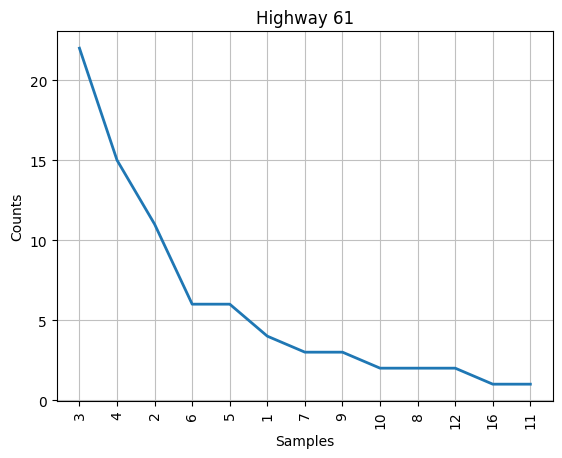

<Axes: title={'center': 'Highway 61'}, xlabel='Samples', ylabel='Counts'>

In [11]:
hw61_string = hw61_df.Lyric.to_string()
hw61_words = list(hw61_string.split())
hw61_lengths = [len(word) for word in hw61_words]
hw61_freq_words = nltk.FreqDist(hw61_lengths)
hw61_freq_words.plot(15, title='Highway 61')

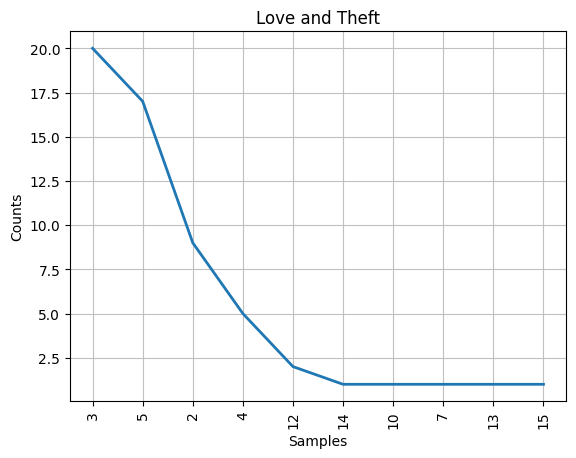

<Axes: title={'center': 'Love and Theft'}, xlabel='Samples', ylabel='Counts'>

In [12]:
LaT_string = LaT_df.Lyric.to_string()
LaT_words = list(LaT_string.split())
LaT_lengths = [len(word) for word in LaT_words]
LaT_freq_words = nltk.FreqDist(LaT_lengths)
LaT_freq_words.plot(15, title='Love and Theft')

## Task 11: Compare Frequent Words

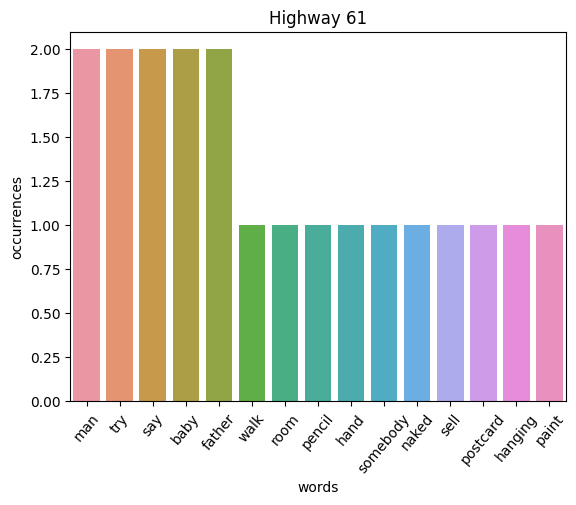

In [13]:
hw61_clean_string = hw61_df.clean_text.to_string()
hw61_word_list = hw61_clean_string.split()
hw61_word_freq = Counter(word for word in hw61_word_list if word.isalpha())
hw61_sorted_word_freq = hw61_word_freq.most_common(15)
hw61_sorted_word_freq = pd.DataFrame.from_dict(hw61_sorted_word_freq)
hw61_sorted_word_freq.columns = ['words', 'occurrences']
sns.barplot(hw61_sorted_word_freq, x='words', y='occurrences')
plt.xticks(rotation=50)
plt.title('Highway 61')
plt.show()

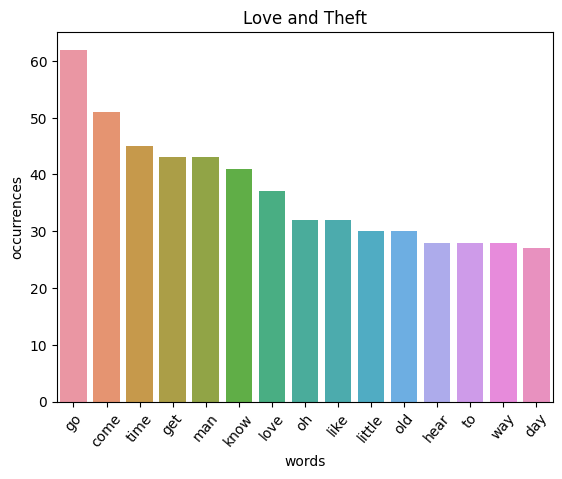

In [14]:
LaT_clean_string = LaT_df.clean_text.to_string()
LaT_word_list = LaT_clean_string.split()
LaT_word_freq = Counter(word for word in LaT_word_list if word.isalpha() and word not in ['word', 'music', 'bob', 'dylan'])
LaT_sorted_word_freq = LaT_word_freq.most_common(15)
LaT_sorted_word_freq = pd.DataFrame.from_dict(sorted_word_freq)
LaT_sorted_word_freq.columns = ['words', 'occurrences']
sns.barplot(LaT_sorted_word_freq, x='words', y='occurrences')
plt.xticks(rotation=50)
plt.title('Love and Theft')
plt.show()

## Task 12: Compare lexical diversity

In [15]:
unique_words = set(hw61_words)
lexical_diversity = len(unique_words)/len(hw61_words)
print ('The lexical diversity of Highway 61 is ', lexical_diversity)

The lexical diversity of Highway 61 is  0.8589743589743589


In [16]:
unique_words = set(LaT_words)
lexical_diversity = len(unique_words)/len(LaT_words)
print ('The lexical diversity of Love and Theft is ', lexical_diversity)

The lexical diversity of Love and Theft is  0.6206896551724138


## Task 13: Compare function words

In [17]:
func_words = stopwords.words('english')

hw61_func = []

for word in func_words:
    relative_freq = hw61_string.count(word)/len(hw61_words)
    hw61_func.append(relative_freq)

LaT_func = []

for word in func_words:
    relative_freq = LaT_string.count(word)/len(LaT_words)
    LaT_func.append(relative_freq)   

hw61_np = np.array(hw61_func)
LaT_np = np.array(LaT_func)

cosine_similarity = np.dot(hw61_np, LaT_np) / (norm(hw61_np) * norm(LaT_np))
print ('The cosine similarity between the two albums is', cosine_similarity)

The cosine similarity between the two albums is 0.8205775594532201
